# Исследование рынка недвижимости в Санкт-Петербурге

На данных сервиса Яндекс.Недвижимость мы установим параметры для определения рыночной стоимости объектов недвижимости. Это позволит построить автоматизированную систему для отслеживания аномалий и мошеннической деятельности.

**Задачи исследования**

  1. Изучить время продажи квартиры.
  2. Найти факторы, больше всего влияющие на стоимость квартиры.
  3. Изучить предложение квартир по локации.
  4. Выделить и описать сегмент квартир в центре.

**Ход исследования**

В файле `data.csv` содержится архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных.

Поскольку часть данных вписаны пользователями, они могут содержать ошибки. Перед решение задач исследования понадобится обзор данных. Затем, на этапе предобработки, поищем возможность исправить самые критичные ошибки данных.

Для решения задач исследования необходимо рассчитать и добавить в таблицу несколько показателей:

  * цена квадратного метра,
  * день недели, месяц и год публикации объявления,
  * этаж квартиры (первый, последний, другой),
  * соотношение жилой и общей площади,
  * отношение площади кухни к общей. 

Таким образом, **исследование пройдёт в четыре этапа**:

  1. Обзор данных.
  2. Предобработка данных.
  3. Расчёты и добавление результатов в таблицу.
  4. Исследовательский анализ данных.

## Обзор данных
Составим первое впечатление о входных данных.

In [1]:
# Импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Читаем файл с данными и сохраняем в датафрейм df
df = pd.read_csv('data.csv', sep='\t')

In [3]:
# Обзор датафрейма, получаем 10 случайных строк
df.sample(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
12710,7,3700000.0,35.0,2018-07-22T00:00:00,1,NaN,14.0,20.00,3,NaN,...,7.00,NaN,Санкт-Петербург,42649.0,8819.0,1.0,608.0,0.0,NaN,13.0
17495,19,11050000.0,79.3,2019-01-29T00:00:00,3,2.50,17.0,46.00,14,NaN,...,10.90,NaN,Санкт-Петербург,17390.0,16804.0,1.0,172.0,0.0,NaN,NaN
5555,9,3600000.0,55.0,2018-03-21T00:00:00,3,2.75,3.0,41.10,2,NaN,...,5.00,1.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,162.0
13454,18,3980000.0,60.0,2016-06-02T00:00:00,3,2.65,9.0,37.70,3,False,...,6.60,2.0,Колпино,26338.0,32124.0,0.0,NaN,0.0,NaN,25.0
448,7,4990000.0,58.0,2017-06-30T00:00:00,3,2.50,9.0,35.00,5,NaN,...,6.20,2.0,Санкт-Петербург,50515.0,15843.0,0.0,NaN,0.0,NaN,193.0
18961,10,4600000.0,34.0,2019-03-29T00:00:00,1,2.85,16.0,16.30,9,NaN,...,10.30,NaN,Санкт-Петербург,28490.0,10850.0,1.0,39.0,0.0,NaN,NaN
20750,6,7600000.0,111.0,2018-10-17T00:00:00,5,NaN,14.0,73.00,9,NaN,...,8.50,1.0,Петергоф,45110.0,48534.0,0.0,NaN,0.0,NaN,NaN
19476,1,1750000.0,54.6,2017-11-28T00:00:00,3,NaN,5.0,39.00,3,NaN,...,6.20,NaN,Ивангород,NaN,NaN,NaN,NaN,NaN,NaN,476.0
13427,6,3580000.0,33.6,2018-04-06T00:00:00,1,2.50,9.0,17.00,9,NaN,...,8.00,NaN,Санкт-Петербург,45247.0,17971.0,0.0,NaN,0.0,NaN,9.0
17846,4,9386000.0,45.6,2017-01-09T00:00:00,1,NaN,9.0,18.57,9,NaN,...,16.07,2.0,Санкт-Петербург,25987.0,4823.0,0.0,NaN,2.0,849.0,501.0


В таблице 22 столбца.

Согласно документации к данным:

  * `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
  * `balcony` — число балконов
  * `ceiling_height` — высота потолков (м)
  * `cityCenters_nearest` — расстояние до центра города (м)
  * `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
  * `first_day_exposition` — дата публикации
  * `floor` — этаж
  * `floors_total` — всего этажей в доме
  * `is_apartment` — апартаменты (булев тип)
  * `kitchen_area` — площадь кухни в квадратных метрах (м²)
  * `last_price` — цена на момент снятия с публикации
  * `living_area` — жилая площадь в квадратных метрах (м²)
  * `locality_name` — название населённого пункта
  * `open_plan` — свободная планировка (булев тип)
  * `parks_around3000` — число парков в радиусе 3 км
  * `parks_nearest` — расстояние до ближайшего парка (м)
  * `ponds_around3000` — число водоёмов в радиусе 3 км
  * `ponds_nearest` — расстояние до ближайшего водоёма (м)
  * `rooms` — число комнат
  * `studio` — квартира-студия (булев тип)
  * `total_area` — площадь квартиры в квадратных метрах (м²)
  * `total_images` — число фотографий квартиры в объявлении

В 3-х столбцах выявлены нарушения стиля:

  * `cityCenters_nearest`: слитное написание, заглавная буква → `city_centers_nearest`
  * `parks_around3000`: слитное написание → `parks_around_3000`
  * `ponds_around3000`: слитное написание → `ponds_around_3000`

In [4]:
# Обзор датафрейма, получаем общую информацию
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

В таблице 23698 объектов недвижимости.

В 8 столбцах отмечено несоответсвие типа данных документации:

  * `last_price`: вещественное число `float64`, по документации цена, очевидно, она выражена в рублях без копеек → `int64`
  * `first_day_exposition`: строка `object`, по документации дата → `datetime`
  * `floors_total`: вещественное число `float64`, по документации целое число (этажей) → `int64`
  * `is_apartment`: строка `object`, по документации булев тип → `bool`
  * `balcony`: вещественное число `float64`, по документации целое число (балконов) → `int64`
  * `parks_around3000`: вещественное число `float64`, по документации целое число (парков) → `int64`
  * `ponds_around3000`: вещественное число `float64`, по документации целое число (водоемов) → `int64`
  * `days_exposition`: вещественное число `float64`, по документации целое число (дней) → `int64`

В большей части столбцов количество значений различается, то есть в данных есть пропуски.

In [5]:
# Обзор датафрейма, получаем описательную статистику числовых столбцов
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


В 8 столбцах обнаружены аномальные значения:

  * `last_price`: минимальная цена квартиры 12190 руб. явно не соответсвует рынку. Похоже на ошибку или манипулирование выдачей в сервисе объявлений. Максимальная цена 763 000 000 руб. очень высокая, но возможная для элитных объектов. Такие значения могут влиять на средние, вероятно, их следует исключить.
  * `rooms`: минимальное число комнат 0. Похоже на ошибку, либо может быть указанием на квартиру-студию. Требует подтверждения.
  * `ceiling_height`: минимальная высота потолков 1 метр, максимальная - 100 метров. Оба значения не могут быть корректными. Такие значения могут влиять на средние, их следует исключить.
  * `floors_total`: максимальное количество этажей в доме 60 похоже на ошибку, поскольку жидых домов выше 35 этадей в Санкт-Петерубрге и окретностях нет. Такие неправдоподобные объекты следует исключить.
  * `living_area`: минимальная жилая площадь 2 м² невозможна, значение ошибочно. Такие объекты следует исключить.
  * `kitchen_area`: минимальная площадь кухни 1,3 м² невозможна, значение ошибочно. Такие объекты следует исключить.
  * `airports_nearest`: минимальное значение расстояния до аэропорта 0 м невозможно, либо нет данных, либо ошибка привязки координат. Такие объекты следует исключить.
  * `days_exposition`: минимальное количество дней размещения объявления - 1. Продажа недвижимости за 1 день либо снятие объявления по иной причине не проворечит здравому смыслу, однако, если таких объявлений много, может искажать среднее время экспозиции объявления. При среднем значении 181 день и медианном 95 дней, снятие объявления за 1 день, скорее всего, не является признаком продажи, следовательно, такие значения не должны участвовать в исследовании. Максимальное значение - 1580 дней (более 4-х лет) также может искажать среднее время экспозиции объявления.

**Вывод**

Как и следовало из сопроводительной информации и документации, в каждой строке таблицы находятся данные объектов недвижимости. Колонки описывают объекты по различным критериям, часть данных - пользовательский ввод, часть - данные, полученны из картографического сервиса.

Для решения задач исследования имеющихся данных недостаточно, потребуется выполнить расчеты и внести данные в таблицу.

В 3 столбцах отмечены нарушения стиля заголовков столбцов. В 8 столбцах отмечено несоответствие типа данных столбцов. В данных присутствуют пропуски. В 8 столбцах отмечены аномальные значения.

## Предобработка данных
Исправим именование столбцов. Проведем обработку пропусков. Проведем замену типов данных. Проверим данные на дубликаты.

### Стиль заголовков

In [6]:
# Переименуем столбцы
df = df.rename(columns={'cityCenters_nearest': 'city_centers_nearest', 'parks_around3000': 'parks_around_3000', 'ponds_around3000': 'ponds_around_3000'})

# Проверим результат
df.columns.sort_values()

Index(['airports_nearest', 'balcony', 'ceiling_height', 'city_centers_nearest',
       'days_exposition', 'first_day_exposition', 'floor', 'floors_total',
       'is_apartment', 'kitchen_area', 'last_price', 'living_area',
       'locality_name', 'open_plan', 'parks_around_3000', 'parks_nearest',
       'ponds_around_3000', 'ponds_nearest', 'rooms', 'studio', 'total_area',
       'total_images'],
      dtype='object')

**Вывод**

Стиль заголовков приведен к корректному.

### Обработка пропусков

In [7]:
# Посчитаем пропуски значений
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

В 14 столбцах присутствуют пропуски:

  * `ceiling_height`: 9195 пропусков. 39% объявлений не содержат информации о высоте потолков, это очень существенное количество. Данные этого столбца не имеют решающего значения для целей исследования. Но при оценке параметра следует учесть, что для более чем трети объектом он не указан. Оставим пропуски.
  * `floors_total`: 86 пропусков. Такое малое число не повлияет на исследование, оставим пропуски.
  * `living_area`: 1903 пропусков. Вероятно, пользователи не указывают точный метраж, поскольку не знают его или считают такую информацию излишней (указывают только число комнат). Менее 10% пропусков, но данные этого столбца важны для исследования. Заполнить значения нечем, оставим пропуски.
  * `is_apartment`: 20924 пропусков. Вероятно, пользователи часто не указывают тип недвижимости, если он обычный жилой. Пропуски заменим на `False`.
  * `kitchen_area`: 2278 пропусков. Вероятно, пользователи не указывают точный метраж, поскольку не знают его или считают такую информацию излишней. Менее 10% пропусков, но данные этого столбца важны для исследования. Заполнить значения нечем, оставим пропуски.
  * `balcony`: 11519 пропусков. Вероятно, пользователи часто не указывают число балконов, если их нет. Пропуски заменим на нули.
  * `locality_name`: 49 пропусков. Такое малое число не повлияет на исследование, оставим пропуски.
  * `airports_nearest`: 5542 пропусков. Скорее всего, для этих объектов не была получена информация на основе картографических данных. Поэтому пропуски оставим.
  * `city_centers_nearest`: 5519 пропусков. Скорее всего, для этих объектов не была получена информация на основе картографических данных. Пропуски в столбце на задачи исследования не влияют, оставим их.
  * `parks_around_3000`: 5518 пропусков. Число совпадает с числом пропусков `ponds_around_3000`, что выглядит подозрительно. Скорее всего, для этих объектов не была получена информация на основе картографических данных. Пропуски в столбце на задачи исследования не влияют, оставим их.
  * `parks_nearest`: 15620 пропусков. Более половины объектов не имеют информации о ближайшем парке. Скорее всего, информация на основе картографических данных не была получено. Пропуски в столбце на задачи исследования не влияют, оставим их.
  * `ponds_around_3000`: 5518 пропусков. Число совпадает с числом пропусков `parks_around_3000`, что выглядит подозрительно. Скорее всего, для этих объектов не была получена информация на основе картографических данных. Пропуски в столбце на задачи исследования не влияют, оставим их.
  * `ponds_nearest`: 14589 пропусков. Более половины объектов не имеют информации о ближайшем парке. Скорее всего, информация на основе картографических данных не была получено. Пропуски в столбце на задачи исследования не влияют, оставим их.
  * `days_exposition`: 3181 пропусков. 13% объявлений не содержат информации о количестве дней размещения объявления, что странно, поскольку эти данные должны были быть получены автоматически. Вероятно, это техническая ошибка сбора или выгрузки данных. Данные этого столбца важны для исследования. Заполнить значения нечем, оставим пропуски.

Обработаем пропуски в столбцах `is_apartment` (заменим на `False`) и `balcony` (заменим на нули).

In [8]:
# Обработаем пропуски в столбцах is_apartment и balcony
df.fillna({'is_apartment': False, 'balcony': 0}, inplace=True)

# Проверим пропуски в столбцах
df[['is_apartment', 'balcony']].isna().sum()

is_apartment    0
balcony         0
dtype: int64

**Вывод**

Найдены пропуски в 14 столбцах. Обработаны пропуски для столбцов `is_apartment` и `balcony`.

Для других столбцов принято решение оставить пропуски, не заменяя на нули или характерные значения.

Для целей исследования могут иметь значение найденные в столбцах `living_area`, `kitchen_area`, `days_exposition` пропуски.

### Замена типа данных

На этапе обзора данных мы определили столбцы, для которых требуется изменить тип данных. Позднее на этапе обработки пропусков определили столбцы, в которых было решено оставить пропуски. Из-за этого часть столбцов невозможно будет привести к `int64`. Для этих случаев оставим тип `float64`.

  * `last_price` пропусков нет → `int64`
  * `floors_total` оставляем пропуски, оставляем `float64`
  * `first_day_exposition` пропусков нет → `datetime`
  * `is_apartment` пропуски обработаны → `bool`
  * `balcony` пропуски обработаны → `int64`
  * `parks_around_3000` оставляем пропуски, оставляем `float64`
  * `ponds_around_3000` оставляем пропуски, оставляем `float64`
  * `days_exposition` оставляем пропуски, оставляем `float64`

#### Столбцы last_price и balcony

Заменим тип данных в колонках `last_price` и `balcony` на целочисленный с помощью функции `pandas.DataFrame.astype`.

In [9]:
# Изменим тип данных в колонках last_price и balcony
df = df.astype({'last_price': 'int64', 'balcony': 'int64'})

#### Столбец first_day_exposition

Заменим тип данных в колонке `first_day_exposition` на дату и время с помощью функции `pandas.to_datetime`.

In [10]:
# Изменим тип данных в колонке first_day_exposition
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

#### Столбец is_apartment object

Заменим тип данных в колонке `is_apartment` сравнением значений строк с `True`.

In [11]:
# Сравним значения в колонке `is_apartment` с True и перезапишем полученные булевы значения обратно
df['is_apartment'] = df['is_apartment'] == True

In [12]:
# Проверим изменение типа данных
df.dtypes

total_images                     int64
last_price                       int64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                   float64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int64
locality_name                   object
airports_nearest               float64
city_centers_nearest           float64
parks_around_3000              float64
parks_nearest                  float64
ponds_around_3000              float64
ponds_nearest                  float64
days_exposition                float64
dtype: object

**Вывод**

Для столбцов `floors_total`, `parks_around_3000`, `ponds_around_3000`, `days_exposition` с пропусками оставлен тип данных `float64`.

Для столбцов `last_price` и `balcony` тип данных был заменен на `int64`, для `first_day_exposition` - на `datetime`, для `is_apartment` - на `bool`.

### Обработка дубликатов

In [13]:
# Проверим датафрейм на явные строковые дубликаты
df.duplicated().sum()

0

**Вывод**

Явные дубликаты в датафрейме отсутствуют.

## Расчёты и добавление результатов в таблицу

Расчитаем и добавим в таблицу данные, которые потребуются для решения задач исследования.

  * `square_meter_price`: цена квадратного метра
  * `first_exposition_weekday`: день недели публикации объявления
  * `first_exposition_month`: месяц публикации объявления
  * `first_exposition_year`: год публикации объявления
  * `floor_cat`: этаж квартиры по категориям (первый, последний, другой)
  * `living_total_ratio`: соотношение жилой площади и общей площади
  * `kitchen_total_ratio`: отношение площади кухни и общей площади

### Столбец square_meter_price

In [14]:
# Добавим столбец с ценой квадратного метра
df['square_meter_price'] = df['last_price'] / df['total_area']

# Округлим полученную цену до копеек
df['square_meter_price'] = df['square_meter_price'].round(2)

### Столбцы first_exposition_weekday, first_exposition_month, first_exposition_year

In [15]:
# Добавим столбец с днем недели публикации объявления
df['first_exposition_weekday'] = df['first_day_exposition'].dt.weekday

# Добавим столбец с месяцем публикации объявления
df['first_exposition_month'] = df['first_day_exposition'].dt.month

# Добавим столбец с годом публикации объявления
df['first_exposition_year'] = df['first_day_exposition'].dt.year

### Столбец floor_cat

In [16]:
# Определим функцию, которая возвращает категорию
# этажа в зависимости от указанного эатажа и общего
# количества этажей объекта недвижимости
def get_floor_cat(row):
    '''Возвращает категорию этажа:
    - 'первый', если floor = 1;
    - 'последний', если floor = floors_total;
    - 'другой', если floor любое другое значение'''
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'

In [17]:
# Добавим столбец с категорией этажа квартиры
df['floor_cat'] = df.apply(get_floor_cat, axis=1)

### Столбцы living_total_ratio и kitchen_total_ratio

In [18]:
# Добавим столбец с соотношением жилой площади и общей площади
df['living_total_ratio'] = df['living_area'] / df['total_area']

# Добавим столбец с отношением площади кухни и общей площади
df['kitchen_total_ratio'] = df['kitchen_area'] / df['total_area']

In [19]:
# Проверим добавленные столбцы, выведем первые 10 строк таблицы
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around_3000,ponds_nearest,days_exposition,square_meter_price,first_exposition_weekday,first_exposition_month,first_exposition_year,floor_cat,living_total_ratio,kitchen_total_ratio
0,20,13000000,108.00,2019-03-07,3,2.70,16.0,51.00,8,False,...,2.0,755.0,NaN,120370.37,3,3,2019,другой,0.472222,0.231481
1,7,3350000,40.40,2018-12-04,1,NaN,11.0,18.60,1,False,...,0.0,NaN,81.0,82920.79,1,12,2018,первый,0.460396,0.272277
2,10,5196000,56.00,2015-08-20,2,NaN,5.0,34.30,4,False,...,2.0,574.0,558.0,92785.71,3,8,2015,другой,0.612500,0.148214
3,0,64900000,159.00,2015-07-24,3,NaN,14.0,NaN,9,False,...,3.0,234.0,424.0,408176.10,4,7,2015,другой,NaN,NaN
4,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.00,13,False,...,1.0,48.0,121.0,100000.00,1,6,2018,другой,0.320000,0.410000
5,10,2890000,30.40,2018-09-10,1,NaN,12.0,14.40,5,False,...,NaN,NaN,55.0,95065.79,0,9,2018,другой,0.473684,0.299342
6,6,3700000,37.30,2017-11-02,1,NaN,26.0,10.60,6,False,...,0.0,NaN,155.0,99195.71,3,11,2017,другой,0.284182,0.386059
7,5,7915000,71.60,2019-04-18,2,NaN,24.0,NaN,22,False,...,0.0,NaN,NaN,110544.69,3,4,2019,другой,NaN,0.263966
8,20,2900000,33.16,2018-05-23,1,NaN,27.0,15.43,26,False,...,NaN,NaN,189.0,87454.76,2,5,2018,другой,0.465320,0.265682
9,18,5400000,61.00,2017-02-26,3,2.50,9.0,43.60,7,False,...,0.0,NaN,289.0,88524.59,6,2,2017,другой,0.714754,0.106557


**Вывод**

В таблицу добавлены столбцы, необходимые для решения задач исследования: `square_meter_price`, `first_exposition_weekday`, `first_exposition_month`, `first_exposition_year`, `floor_cat`, `living_total_ratio`, `kitchen_total_ratio`.

Следует отметить, что в полученных расчетных значениях встречаются пропуски из-за пропусков в исходных данных. В столбце `floor_cat` для 86 строк категория этажа могла определиться неправильно (вместо `последний` - `другой`), поскольку значения количества этажей для этих объектов недвижимости отсутствуют. Поскольку доля потенциальных ошибок крайне мала, на результатах исследования они сказаться не могут.

## Исследовательский анализ данных

### Изучение параметров объектов недвижимости

Рассмотрим площадь, цену, число комнат, высоту потолков. Для каждого параметра построим гистограммы.

#### Площадь объектов недвижимости

In [20]:
# Получим описательную статистику столбца
df['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

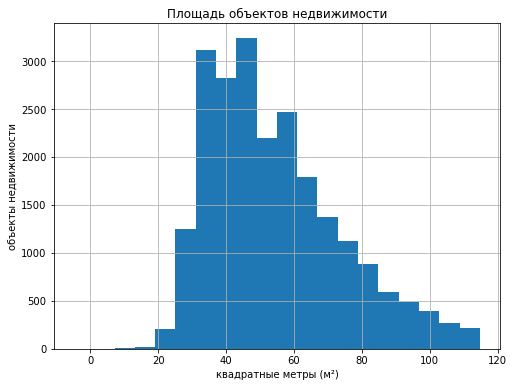

In [21]:
# Рассчитаем Q1, Q3 и IQR для построения графика без выбросов
q1 = df['total_area'].quantile(0.25) # первый квартиль Q1
q3 = df['total_area'].quantile(0.75) # третий квартиль Q3
iqr = q3 - q1 # межквартильный размах IQR

# Построим гистограмму площади
df['total_area'].hist(bins=20, range=((q1 - 1.5 * iqr), (q3 + 1.5 * iqr)), figsize=(8, 6))
plt.title('Площадь объектов недвижимости')
plt.xlabel('квадратные метры (м²)')
plt.ylabel('объекты недвижимости')
plt.show()

Рассматриваем диапазон до 115 м², исключая выбросы.

Большинство объектов недвижимости имеют площадь от 30 до 65 м². Самый распространенный вариант - 40-45 м². Число объектов недвижимости с площадью более 110 м² небольшое.

Среднее 60 м² и медиана 52 м² оказались сдвинутыми в большую сторону из-за длинного "хвоста" редких, но больших значений.

#### Цена объектов недвижимости

In [22]:
# Получим описательную статистику столбца
df['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

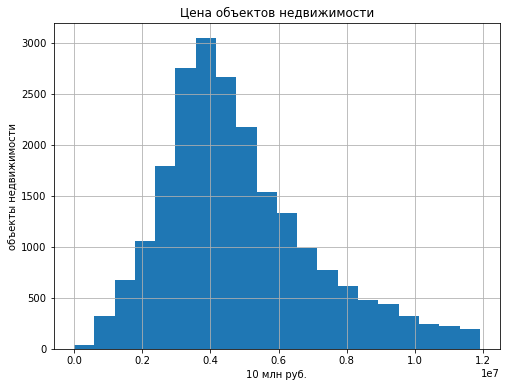

In [23]:
# Рассчитаем Q1, Q3 и IQR для построения графика без выбросов
q1 = df['last_price'].quantile(0.25) # первый квартиль Q1
q3 = df['last_price'].quantile(0.75) # третий квартиль Q3
iqr = q3 - q1 # межквартильный размах IQR

# Построим гистограмму цены
df['last_price'].hist(bins=20, range=(0, (q3 + 1.5 * iqr)), figsize=(8, 6))
plt.title('Цена объектов недвижимости')
plt.xlabel('10 млн руб.')
plt.ylabel('объекты недвижимости')
plt.show()

Рассматриваем диапазон до 12 млн, исключая выбросы.

Большинство объектов недвижимости имеют цену от 3 до 5 млн. Самый распространенный вариант - 3-4 млн. Число объектов недвижимости с ценой более 10 млн небольшое.

Среднее 6,5 млн оказалось сдвинутым в большую сторону из-за длинного "хвоста" редких, но больших значений. Медиана 4,6 млн достаточно точна.

#### Число комнат объектов недвижимости

In [24]:
# Получим описательную статистику столбца
df['rooms'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

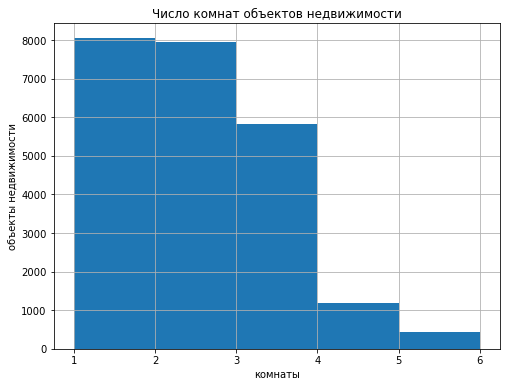

In [25]:
# Рассчитаем Q1, Q3 и IQR для построения графика без выбросов
q1 = df['rooms'].quantile(0.25) # первый квартиль Q1
q3 = df['rooms'].quantile(0.75) # третий квартиль Q3
iqr = q3 - q1 # межквартильный размах IQR

# Построим гистограмму числа комнат
df['rooms'].hist(bins=5, range=(1, (q3 + 1.5 * iqr)), figsize=(8, 6))
plt.title('Число комнат объектов недвижимости')
plt.xlabel('комнаты')
plt.ylabel('объекты недвижимости')
plt.show()

Рассматриваем диапазон от 1 до 5 комнат, исключая некорректные значения (0 комнат) и выбросы.

Большинство объектов недвижимости имеют 1 или 2 комнаты, несколько меньше имеют 3 комнаты. Объекты недвижимости, имеющие 4-5 комнат, представлены минимально.

Среднее и медиана 2 комнаты точны. Крайне редкие значения (от 6 до 19 комнат) не оказывают существенного влияния на среднее значение.

#### Высота потолков объектов недвижимости

In [26]:
# Получим описательную статистику столбца
df['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

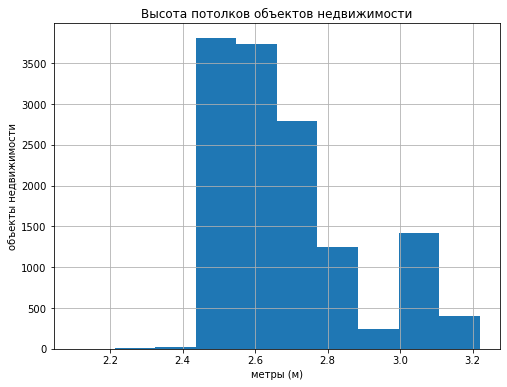

In [27]:
# Рассчитаем Q1, Q3 и IQR для построения графика без выбросов
q1 = df['ceiling_height'].quantile(0.25) # первый квартиль Q1
q3 = df['ceiling_height'].quantile(0.75) # третий квартиль Q3
iqr = q3 - q1 # межквартильный размах IQR


# Построим гистограмму высоты потолков
df['ceiling_height'].hist(bins=10, range=((q1 - 1.5 * iqr), (q3 + 1.5 * iqr)), figsize=(8, 6))
plt.title('Высота потолков объектов недвижимости')
plt.xlabel('метры (м)')
plt.ylabel('объекты недвижимости')
plt.show()

Рассматриваем диапазон от 2,1 до 3,2 м, исключая некорректные значения (1 м, 100 м) и выбросы.

Большинство объектов недвижимости имеют высоту потолков 2,5 м. Реже представлены варианты от 2,6 до 2,75 м. Значения выше уже редки.

Среднее 2,77 м и медиана 2,65 точны. Крайне редкие значения менее 2,1 м и более 3,2 м не оказывают существенного влияния на среднее значение.

**Вывод**

Изучив параметры, можно получить представление о типичном объекте недвижимости из датафрейма: квартира с 1 или 2 комнатами, площадью 45 м², с высотой потолков 2,5 м и стоимостью 4 млн.

### Изучение время продажи объекта недвижимости
Рассмотрим и опишем время продажи квартиры.

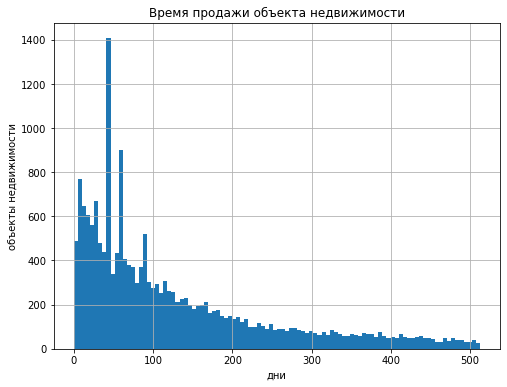

In [28]:
# Рассчитаем Q1, Q3 и IQR для построения графика без выбросов
q1 = df['days_exposition'].quantile(0.25) # первый квартиль Q1
q3 = df['days_exposition'].quantile(0.75) # третий квартиль Q3
iqr = q3 - q1 # межквартильный размах IQR

# Построим гистограмму времени продажи объекта недвижимости
df['days_exposition'].hist(bins=100, range=(0, (q3 + 1.5 * iqr)), figsize=(8, 6))
plt.title('Время продажи объекта недвижимости')
plt.xlabel('дни')
plt.ylabel('объекты недвижимости')
plt.show()

На гистограмме много значений в зоне около нуля, при выбранном масштабе оценить количество минимальных значений невозможно. Виден длинный "хвост" значений, где время продажи составило более 300 дней. Рассмотрим область до 200 дней, куда попадает большинство значений.

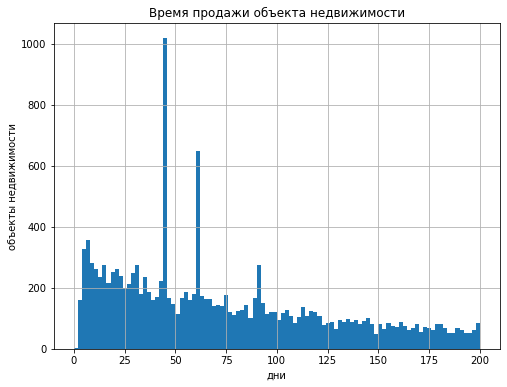

In [29]:
# Ограничим гистограмму периодом до 200 дней
df['days_exposition'].hist(bins=100, range=(0, 200), figsize=(8, 6))
plt.title('Время продажи объекта недвижимости')
plt.xlabel('дни')
plt.ylabel('объекты недвижимости')
plt.show()

На гистрограмме выделяются 2 пика (по 1000 и 650 объектов недвижимость), изучим их, увеличив масштаб.

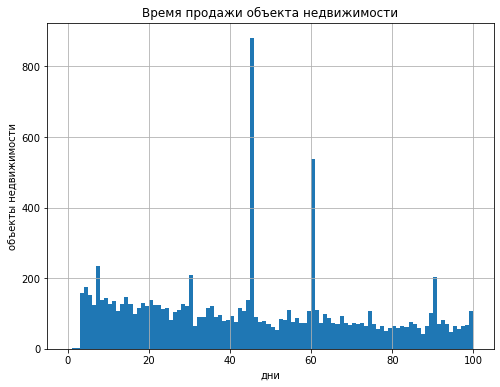

In [30]:
# Увеличим масштаб гистограммы
df['days_exposition'].hist(bins=100, range=(0, 100), figsize=(8, 6))
plt.title('Время продажи объекта недвижимости')
plt.xlabel('дни')
plt.ylabel('объекты недвижимости')
plt.show()

Судя по гистограмме, наиболее частыми значениями времени продажи объекта недвижимости являются 45 и 60 дней. Вероятно, это как-то связано с механизмом размещения объявлений в сервисе Яндекс.Недвижимости. Так, объявления со сроком экспозиции 45 дней могут автоматически сниматься, если не продлены.

Более низкие пики есть и для других "ровных" значений - 7, 30, 90 дней, что говорит в пользу версии об особенностях размещения объявлений в сервисе. Объявления могут сниматься автоматически через определенные периоды, если не продлены. Продление или непродление может зависеть от разных причин. Объявление может остаться в сервисе, даже если объект недвижимости уже фактически продан. В этом случае экспозиция объявления может быть прекращена автоматически после определенного срока.

Минимальное значение (1 день) оказалось крайне редким. Уход среднего значения в меньшую сторону маловероятнен. Выведем среднее и медиану.

In [31]:
# Получим описательную статистику столбца days_exposition
df['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Среднее время продажи объекта недвижимости 181 день.

Медианное время продажи объекта недвижимости 95 дней.

Максимальное значение - 1580 дней. Судя по длинному "хвосту" гистограммы, больших значений много. Об этом также можно судить по тому, что среднее значение вдвое выше медианного. Величина стандартного отклонения превышает среднее значение, в данных много выбросов. Для визуализации выбросов построим диаграмму размаха.

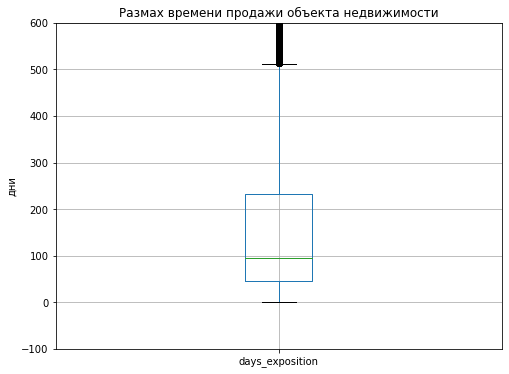

In [32]:
# Построим диаграмму размаха времени продажи объекта недвижимости

df.boxplot(column='days_exposition', figsize=(8, 6))
plt.title('Размах времени продажи объекта недвижимости')
plt.ylim(-100, 600)
plt.ylabel('дни')
plt.show()

Значения времени продажи объекта недвижимости более 512 дней - выбросы.

Для дальнейшей работы сделаем срез датафрейма, очищенный от выбросов.

In [33]:
# Формируем срез данных, очищенных от выбросов
df_filtered = df.query('days_exposition < 512')

# Проверим, сколько строк осталось в датафрейме
len(df_filtered)

18844

**Вывод**

Из таблицы были убраны 4855 строк, в значении времени продажи объекта недвижимости содержащих выбросы.

Время продажи объекта недвижимости можно оценить следующим образом. Быстрая продажа - до 45 дней. Нормальное время продажи - от 45 до 232 дней. Долгие продажи - от 232 до 512 дней. Продажи после 512 дней аномальны и являются выбросами.

### Изучение факторов, влияющих на стоимость объекта недвижимости
Оценим, как на стоимость объекта недвижимости влияет общая площадь, число комнат, расстояние от центра города, категория этажа (первый, последний), день недели, месяц и год размещения объявления.

Для расчета коэффициента корреляции Пирсона стоимости объекта недвижимости и категории этажа, переведем значения столбца `floor_cat` в числа (0 - первый, 1 - последний).

In [34]:
# Определим функцию, которая переводит запись категории этажа в числа
def get_floor_cat_bool(floor_cat):
    '''Переводит запись категории этажа в числа:
    - 0, если floor_cat = 'первый'
    - 1, если floor_cat = 'последний'
    - Nan в остальных случаях
    '''
    if floor_cat == 'первый':
        return 0
    elif floor_cat == 'последний':
        return 1
    else:
        return None

# Добавим столбец с числовой категорией этажа (первый, последний)
df_filtered['floor_cat_bool'] = df_filtered['floor_cat'].apply(get_floor_cat_bool)

C:\Users\AL\AppData\Local\Temp/ipykernel_12592/2794413348.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['floor_cat_bool'] = df_filtered['floor_cat'].apply(get_floor_cat_bool)


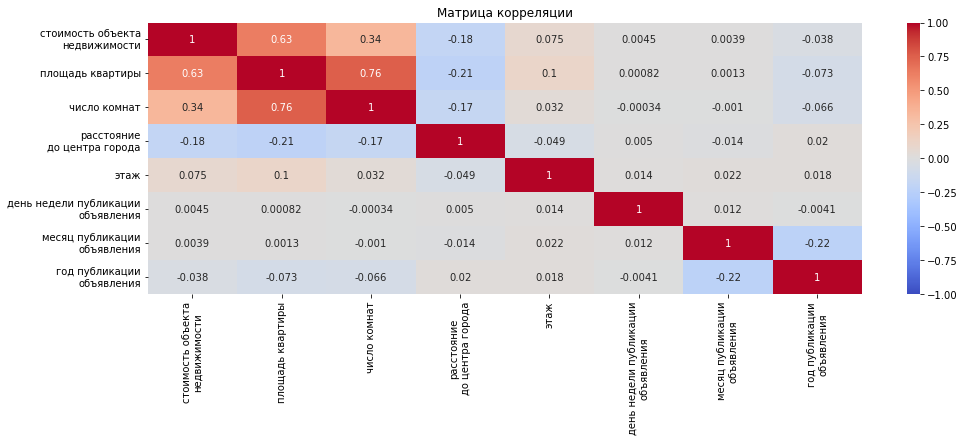

In [35]:
# Составим список с проверяемыми параметрами
correlation_parameters = [
    'last_price',
    'total_area',
    'rooms',
    'city_centers_nearest',
    'floor_cat_bool',
    'first_exposition_weekday',
    'first_exposition_month',
    'first_exposition_year'
]

# Составим список с названиями параметров
correlation_labels = [
    'стоимость объекта\nнедвижимости',
    'площадь квартиры',
    'число комнат',
    'расстояние\nдо центра города',
    'этаж',
    'день недели публикации\nобъявления',
    'месяц публикации\nобъявления',
    'год публикации\nобъявления']

# Получаем матрицу корреляции
corr_matrix = df_filtered[correlation_parameters].corr()

# Визуализируем матрицу корреляции
plt.figure(figsize = (16,5))
sns.heatmap(corr_matrix, vmin=-1, vmax=1,
            cmap='coolwarm', annot=True,
            yticklabels=correlation_labels,
            xticklabels=correlation_labels)
plt.title('Матрица корреляции')
plt.show()

**Вывод**

  * Наиболее сильная положительная линейная связь между стоимостью объекта недвижимости и его площадью. Чем больше площадь объекта недвижимости, тем выше его стоимость.
  * Положительная линейная связь отмечается между стоимостью объекта недвижимости и количеством комнат. Связь примерно в 2 раза меньше, чем между стоимостью и площадью. Чем больше комнат, тем выше стоимость. Вероятно, взаимосвязь менее выражена из-за того, что число комнат - условное понятие, недостаточно точно характеризующее объект недвижимости. Комнаты могут быть очень разной площади, скорее всего, корреляция здесь в некоторой степени отражает корреляцию стоимости и площади.
  * Слабая отрициательная линейная связь отмечается между стоимостью объекта недвижимости и расстоянием до центра города. С уменьшением расстояния до центра растет стоимость объекта недвижимости.
  * Между стоимостью объекта недвижимости и этажом (первый, последний) отсутствует линейная связь.
  * Между стоимостью объекта недвижимости и днем недели, месяцем или годом размещения объявления отсутствует линейная связь.

### Стоимость квадратного метра в населенных пунктах
Рассчитаем и оценим среднюю цену квадратного метра в 10 населенных пунктах с наибольшим числом объявлений.

In [36]:
# Получим 10 населенных пунктов с наибольшим числом объявлений
top_localities = df['locality_name'].value_counts().head(10)

In [37]:
# Рассчитаем среднюю цену квадратного метра
(
df.query('locality_name in @top_localities.index')
    .pivot_table(index='locality_name', values='square_meter_price')
    .sort_values(by='square_meter_price', ascending=False)
)

,square_meter_price
locality_name,
Санкт-Петербург,114849.008793
Пушкин,103125.819377
деревня Кудрово,92473.547559
посёлок Парголово,90175.913089
посёлок Мурино,85752.189157
посёлок Шушары,78677.364318
Колпино,75424.579112
Гатчина,68746.146515
Всеволожск,68654.473970


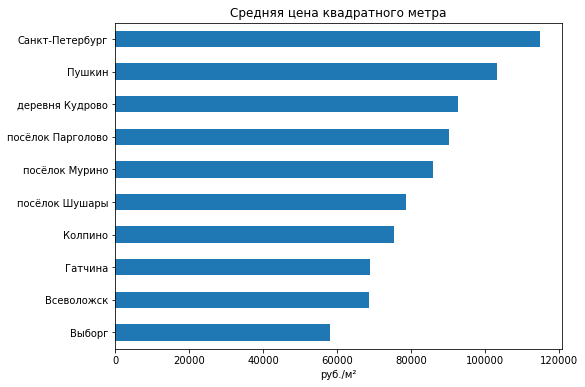

In [38]:
# Визуализируем среднюю цену квадратного метра
(
df.query('locality_name in @top_localities.index')
    .pivot_table(index='locality_name', values='square_meter_price')
    .sort_values(by='square_meter_price')
    .plot(kind='barh', legend=False, figsize=(8, 6))
)
plt.title('Средняя цена квадратного метра')
plt.xlabel('руб./м²')
plt.ylabel('')
plt.show()

**Вывод**

Среди 10 населенных пунктов с наибольшим числом объявлений самая высокая стоимость квадратного метра в Санкт-Петербурге - 114 849 руб./м². На втором месте город Пушкин (в составе Санкт-Петербурга) - 103 126 руб./м². Деревня Кудрово (в настоящий момент город) имеет самую высокую стоимость квадратного метра среди населенных пунктов, расположенных за пределами Санкт-Петербурга. Самая низкая стоимость квадратного метра в расположенном в 174 км от Санкт-Петербурга городе Выборге - 58 141 руб./м².

### Анализ сегмента объектов недвижимости в центре Санкт-Петербурга
Выделим сегмент объектов недвижимости в центре Санкт-Петербурга. Проанализируем сегмент, изучим следующие параметры: площадь, цена, число комнат, высота потолков. Определим факторы, влияющие на стоимость объекта недвижимости. Сравним факторы для сегмента в центре и для всего города.

#### Определение сегмента

In [39]:
# Выделим сегмент объектов недвижимости в Санкт-Петербурге
df_filtered_spb = df_filtered.query('locality_name == "Санкт-Петербург"')

# Количество строк сегмента
len(df_filtered_spb)

12474

В сегмент объектов недвижимости в Санкт-Петербурге попало 12474 строки. Определим центр с помощью стоимости квадратного метра. Для выделенного сегмента объектов недвижимости в Санкт-Петербурге построим график, на котором расстоянию с шагом в 1 км соотвествует средняя стоимость квадратного метра. Точку, где график покажет резкое изменение стоимости квадратного метра в меньшую сторону, будем считать границей центра города.

In [40]:
# Добавим столбец с расстоянием до центра в км
df_filtered_spb['city_centers_nearest_km'] = (df_filtered_spb['city_centers_nearest'] / 1000).round()

C:\Users\AL\AppData\Local\Temp/ipykernel_12592/3615103559.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_spb['city_centers_nearest_km'] = (df_filtered_spb['city_centers_nearest'] / 1000).round()


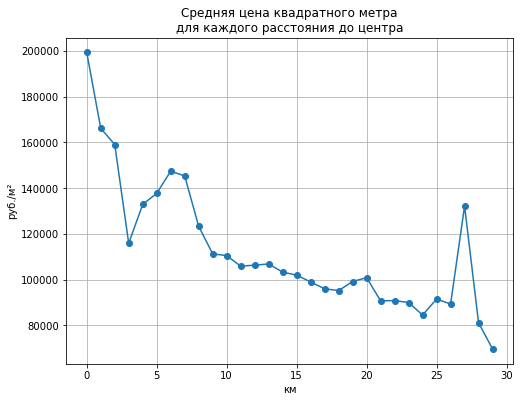

In [41]:
# Рассчитаем среднюю цену квадратного метра для каждого расстояния до центра
(
df_filtered_spb
    .pivot_table(index='city_centers_nearest_km', values='square_meter_price')
    .plot(marker='o', grid=True, figsize=(8, 6), legend=False)
)
plt.title('Средняя цена квадратного метра\nдля каждого расстояния до центра')
plt.xlabel('км')
plt.ylabel('руб./м²')
plt.show()

Самая высокая стоимость квадратного метра в зоне 0 км (менее 500 метров от центра города). После 8 км график приобретает почти линейную форму, стоимость начинает заметно снижаться. Определим границу центра Санкт-Петербурга в радиусе 8 км от центральной точки города.

In [42]:
# Выделим сегмент объектов недвижимости в центре Санкт-Петербурге
df_filtered_spb_center = df_filtered_spb.query('city_centers_nearest_km <= 8')

# Количество строк сегмента
len(df_filtered_spb_center)

2976

**Вывод**

Выделен сегмент объектов недвижимости в центре Санкт-Петербурге (в пределах 8 км), в который попало 2976 строк.

#### Изучение сегмента
Изучим площадь, цену квадратного метра, число комнат, высоту потолков объектов недвижимости, отнесенных к центру Санкт-Петербурга.

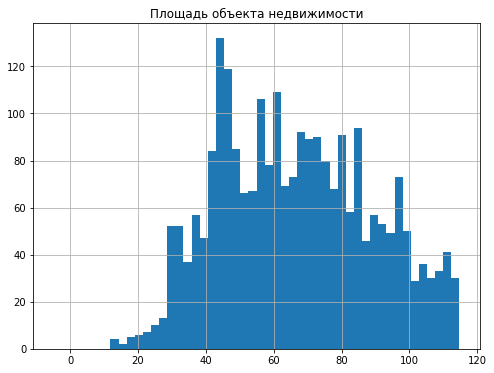

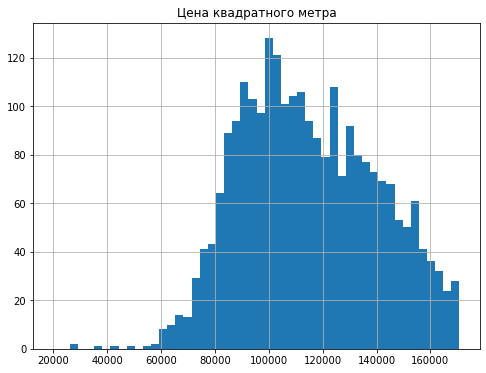

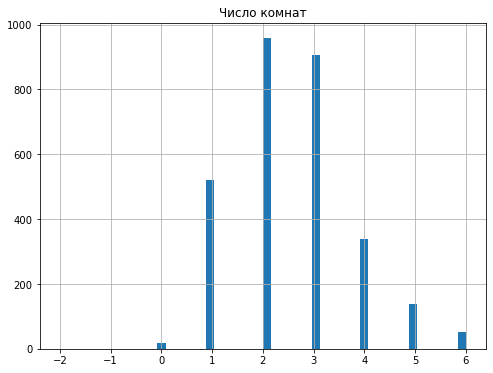

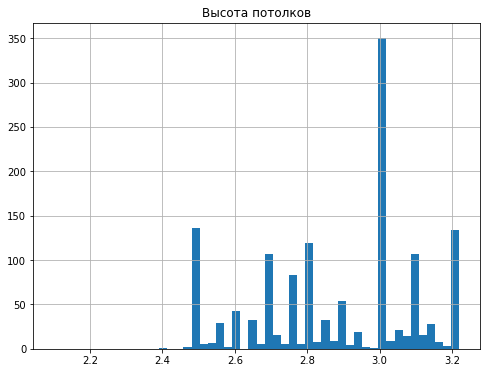

In [43]:
# Составим словарь с изучаемыми параметрами
hist_parameters = {
    'total_area': 'Площадь объекта недвижимости',
    'square_meter_price': 'Цена квадратного метра',
    'rooms': 'Число комнат',
    'ceiling_height': 'Высота потолков'
}

# Для каждого парамента рассчитаем Q1, Q3 и IQR для исключения выбросов и гистрограмму
for parameter in hist_parameters:
    q1 = df[parameter].quantile(0.25)
    q3 = df[parameter].quantile(0.75)
    iqr = q3 - q1
    (
        df_filtered_spb_center[parameter]
        .hist(bins=50, range=((q1 - 1.5 * iqr), (q3 + 1.5 * iqr)), figsize=(8, 6))
    )
    plt.title(hist_parameters[parameter])
    plt.show()

**Вывод**

Изучив параметры, можно получить представление о типичном объекте недвижимости в центре Санкт-Петербурга: квартира с 2 комнатами, площадью 45 м², с высотой потолков 3 м и стоимостью квадратного метра 100 000 руб.

#### Сравнение сегмента
Определим факторы, которые влияют на стоимость объектов недвижимости, отнесенных к центру Санкт-Петербурга. Рассмотрим число комнат, удаленность от центра, этаж, дату размещения объявления). С помощью коэффициентов корреляции Пирсона сравним, как одни и те же факторы влияют на стоимость в рассматриваемом сегменте и по всему городу.

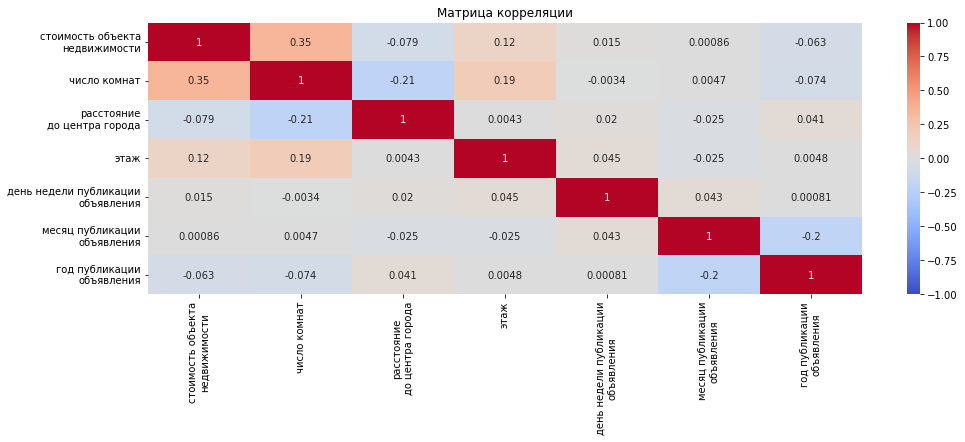

In [44]:
# Составим список с проверяемыми параметрами
correlation_parameters = [
    'last_price',
    'rooms',
    'city_centers_nearest',
    'floor_cat_bool',
    'first_exposition_weekday',
    'first_exposition_month',
    'first_exposition_year'
]

# Составим список с названиями параметров
correlation_labels = [
    'стоимость объекта\nнедвижимости',
    'число комнат',
    'расстояние\nдо центра города',
    'этаж',
    'день недели публикации\nобъявления',
    'месяц публикации\nобъявления',
    'год публикации\nобъявления']

# Получаем матрицу корреляции
corr_matrix = df_filtered_spb_center[correlation_parameters].corr()

# Визуализируем матрицу корреляции
plt.figure(figsize = (16,5))
sns.heatmap(corr_matrix, vmin=-1, vmax=1,
            cmap='coolwarm', annot=True,
            yticklabels=correlation_labels,
            xticklabels=correlation_labels)
plt.title('Матрица корреляции')
plt.show()

**Вывод**

  * Положительная линейная связь отмечается между стоимостью объекта недвижимости и количеством комнат. Для сегмента центра Санкт-Петербурга связь менее выражена, чем по всему городу. Чем больше комнат, тем выше стоимость.
  * Между стоимостью объекта недвижимости и расстоянием до центра города отсутствует линейная связь. Для всего города была отмечена слабая отрициательная линейная связь. Возможное объяснение в том, что выбранный сегмент уже находится в центре города и небольшие расстояния внутри центра не влияют на стоимость.
  * Слабая линейная связь отмечается между стоимостью объекта недвижимости и этажом (первый, последний). Для сегмента центра Санкт-Петербурга связь более выражена, чем по всему городу. Последний этаж характеризуется более высокой стоимость объекта недвижимости, чем первый.
  * Между стоимостью объекта недвижимости и днем недели, месяцем или годом размещения объявления отсутствует линейная связь. Сегмент центра Санкт-Петербурга по этомим параметрам не отличается от всего города.

## Общий вывод

По результатам исследования объявлений о продаже квартир были сделаны выводы, которые следует учесть для определения рыночной стоимости объектов недвижимости.

  * **Наиболее сильно на стоимостью объекта недвижимости влияет его площадь**. Чем больше площадь объекта недвижимости, тем выше его стоимость.
  * **На стоимостью объекта недвижимости влияет количество комнат**. В центре Санкт-Петербурга связь менее выражена. Чем больше комнат, тем выше стоимость.
  * **На стоимостью объекта недвижимости в центре Санкт-Петербурга слабо влияет этаж. Связь по всему городу не выражена**. Последний этаж характеризуется большее высокой стоимость, чем первый.
  * **На стоимостью объекта недвижимости влияет расстояние до центра города. В центре Санкт-Петербурга связь не выражена**. С уменьшением расстояния до центра растет стоимость объекта недвижимости.
---
Также по результатам исследования установлено: 
  * Ожидаемое **время продажи объекта недвижимости - от 45 до 232 дней**.
  * Самая **высокая стоимость квадратного метра в Санкт-Петербурге - 114 849 руб./м²** (среди топ-10 населенных пунктов по количеству объявлений).
  * Самая **низкая стоимость квадратного метра в Выборге - 58 141 руб./м²** (среди топ-10 населенных пунктов по количеству объявлений).